# Dealing with missing values

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing and exploring dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
housing_data = pd.read_csv(url)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#created a new column (income_category) assigned bins using pd.cut function. It will help to create bins for the values
housing_data['income_category'] = pd.cut(housing_data['median_income'],
                                         bins = [0.,1.5,3.0,4.5,6.0, np.inf],
                                         labels = [1,2,3,4,5])
housing_data['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

In [5]:
#stratified split
#split the data using income_category column to make sure that the approx percentages of income_category are evenly distributed in test set and train set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing_data, housing_data ['income_category']):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [6]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

In [7]:
### Dealing with missing values. Many machine learning algorithms don't work very well with missing values. Becuase of this we need to learn to deal with them.
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


### Option 1: Drop the rows with missing values in any columns

In [8]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category


### Option 2: Drop the columns with missing values

In [9]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_category
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5


#### Option 3: Impute (fill in) the values with some replacement value. This can be a completely different value like -999 so the algorithm will learn that the value is missing, or the mean or median or mode of the column

In [10]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

###SimpleImputer

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

###Only keep numerical columns

In [12]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [13]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [14]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [15]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [16]:
imputer.strategy

'median'

In [17]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Encoding Categorical Data

In [18]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [20]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot# Creates a "dense array" meaning that all instances have a value not just the ones that are encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##Feature Engineering
#####Feature engineering is the art/science of using domain knowledge to create new features (columns) of data using raw data. This can be key to improving the performance of your Machine Learning models.

In [23]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [24]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


### Scaling our Data

Many machine learning algorithms don't work well with unscaled data. For example, the magnitude of values in the "total_rooms" feature is going to be substantially higher than that in the "median_income" feature (because the median_income is scaled down by 1000). Because of this we usually will need to scale our values. There are multiple ways to accomplish this, and we will use the StandardScaler which will scale our values to their z-score within their column like so:

z = (x - u) / s

Where x is the value we're scaling, u is the mean of the column, and s is the standard deviation

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

### Concatenating with Categorical Variables

In [26]:
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])
ml_input_data

array([[ 0.        ,  1.        ,  0.        , ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 0.        ,  0.        ,  0.        , ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.        ,  1.        ,  0.        , ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [ 0.        ,  1.        ,  0.        , ...,  0.05505203,
         0.00657083,  0.01407228]])

In [27]:
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


### Pipelines

Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another. There is a little bit of complexity associated with them that leads me to exclude them in this chapter. We will most likely go over them in another chapter.

Instead we'll just create our own version of a pipeline using a normal Python function.

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [29]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Select and Train a Model

## Transform data using the "pipeline" created

We now need to create a clean training dataset to "train" our machine learning regressors, and a "test" set to test the accuracy of said regressors. Let's input our stratified samples into our "pipeline"

In [30]:
train_data, train_labels, features= data_transformations(strat_train_set)
train_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  1.        ,
         0.        ,  0.        ]])

In [31]:
train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [32]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  1.        ,
         0.        ,  0.        ]])

In [33]:
test_labels

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [34]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_category',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [36]:
# Compare against some Test Data

original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,430593.091392,69407.908608
17352,162500.0,285374.202481,-122874.202481
3505,204600.0,232712.800350,-28112.800350
7777,159700.0,194717.728868,-35017.728868
14155,184000.0,248240.731000,-64240.731000


In [37]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

72192.75560700498

In [38]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

63930.674261317494

## Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [40]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation
It seems our performance above was top notch. Instead of just splitting our data into a train and test set and training once, we can do something called *K-Fold Cross-Validation* which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.  

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70824.86460222 69265.43911105 70860.89128052 73143.6242732
 68189.79683417 74845.58694955 75712.26299821 70925.68914136
 69652.74404875 72834.24516312]
Mean: 71625.51444021543
Standard deviation: 2319.858754337931


In [43]:
lin_scores = cross_val_score(lin_reg, train_data, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70943.85334045 64628.7219202  68919.89220922 68389.0637526
 66286.45015435 71719.02964436 69443.250791   68515.28496632
 65638.88401199 69663.62542909]
Mean: 68414.80562195872
Standard deviation: 2162.5718001955343


## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [45]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18796.98816862067

In [46]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51625.50923449 49595.77026479 46903.21986648 52054.44580805
 48038.01373657 51150.37967136 53115.15634704 50223.15213256
 48384.96672942 54583.30969038]
Mean: 50567.3923481122
Standard deviation: 2279.0119694027167


In [47]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68414.805622
std       2279.550831
min      64628.721920
25%      66812.103554
50%      68717.588588
75%      69608.531770
max      71719.029644
dtype: float64

## Fine-Tuning the Model

After you pick a model or set of models that are promising, you'll need to fine-tune the hyperparameters (parameters of the model that aren't affected by training) in order to find the best ones to use for your model. You can use something called Grid Search in order to accomplish this.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64772.12310826017 {'max_features': 2, 'n_estimators': 3}
57072.09148438375 {'max_features': 2, 'n_estimators': 10}
54437.347665709625 {'max_features': 2, 'n_estimators': 30}
62065.79799705809 {'max_features': 4, 'n_estimators': 3}
54799.23918359469 {'max_features': 4, 'n_estimators': 10}
52251.42550351866 {'max_features': 4, 'n_estimators': 30}
61827.24216362284 {'max_features': 6, 'n_estimators': 3}
54454.39027503683 {'max_features': 6, 'n_estimators': 10}
51699.580397496175 {'max_features': 6, 'n_estimators': 30}
59714.39845322457 {'max_features': 8, 'n_estimators': 3}
52876.605451629955 {'max_features': 8, 'n_estimators': 10}
51253.27811015222 {'max_features': 8, 'n_estimators': 30}
63107.485726344115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55910.52432366365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62249.214957622506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54801.69458055852 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [52]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083912,0.001117,0.005013,0.000385,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.068157e+09,-4.278945e+09,...,-4.195428e+09,1.570450e+08,18,-1.098594e+09,-1.124353e+09,-1.157133e+09,-1.112072e+09,-1.111546e+09,-1.120740e+09,1.993788e+07
1,0.242646,0.005232,0.012423,0.000922,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.184555e+09,-3.154756e+09,...,-3.257224e+09,9.818402e+07,11,-6.089889e+08,-6.080849e+08,-6.157070e+08,-6.119024e+08,-6.309264e+08,-6.151219e+08,8.338123e+06
2,0.701931,0.009215,0.039670,0.003637,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.936039e+09,-2.895381e+09,...,-2.963425e+09,7.080106e+07,6,-4.543360e+08,-4.649104e+08,-4.593777e+08,-4.515982e+08,-4.628155e+08,-4.586076e+08,5.008081e+06
3,0.116063,0.006822,0.005311,0.000474,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.881516e+09,-3.750860e+09,...,-3.852163e+09,7.300541e+07,15,-1.083642e+09,-1.082896e+09,-1.057100e+09,-1.040027e+09,-1.030068e+09,-1.058746e+09,2.181094e+07
4,0.396060,0.060692,0.013142,0.001179,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.087652e+09,-2.974170e+09,...,-3.002957e+09,6.967341e+07,8,-5.679803e+08,-5.811372e+08,-5.567299e+08,-5.779105e+08,-5.693073e+08,-5.706130e+08,8.548539e+06
5,1.282080,0.262995,0.039502,0.003878,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.788451e+09,-2.672645e+09,...,-2.730211e+09,5.669557e+07,3,-4.221290e+08,-4.313237e+08,-4.179512e+08,-4.194503e+08,-4.124533e+08,-4.206615e+08,6.197145e+06
6,0.147609,0.003749,0.005026,0.000536,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.907595e+09,-3.700241e+09,...,-3.822608e+09,1.355843e+08,14,-1.033863e+09,-1.037869e+09,-1.022624e+09,-9.803330e+08,-1.008652e+09,-1.016668e+09,2.080919e+07
7,0.491867,0.005398,0.012492,0.001208,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.998511e+09,-2.773622e+09,...,-2.965281e+09,1.064917e+08,7,-5.412755e+08,-5.455482e+08,-5.567747e+08,-5.415096e+08,-5.626985e+08,-5.495613e+08,8.651109e+06
8,1.687424,0.268671,0.042199,0.004254,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.647417e+09,-2.596909e+09,...,-2.672847e+09,6.562391e+07,2,-4.032201e+08,-4.124683e+08,-4.162165e+08,-3.988323e+08,-4.162199e+08,-4.093914e+08,7.102939e+06
9,0.188188,0.003435,0.005386,0.000041,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.717909e+09,-3.631879e+09,...,-3.565809e+09,1.178722e+08,12,-1.008168e+09,-9.676311e+08,-9.464076e+08,-9.396094e+08,-9.169553e+08,-9.557542e+08,3.079487e+07


### Randomized Search

Randomized search allows to more easily find the hyperparameters that we're interested in because instead of searching through all possible combinations, it randomly picks a couple and tries those out.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799feb479fc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799feb47a470>},
                   random_state=42, scoring='neg_mean_squared_error')

In [54]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50328.151594744944 {'max_features': 7, 'n_estimators': 180}
53092.39469233686 {'max_features': 5, 'n_estimators': 15}
52260.393722518136 {'max_features': 3, 'n_estimators': 72}
52189.297463440555 {'max_features': 5, 'n_estimators': 21}
50484.57189087649 {'max_features': 7, 'n_estimators': 122}
52233.51553203958 {'max_features': 3, 'n_estimators': 75}
52196.08229124017 {'max_features': 3, 'n_estimators': 88}
50960.749886872545 {'max_features': 5, 'n_estimators': 100}
51952.307014342405 {'max_features': 3, 'n_estimators': 150}
64994.2748914946 {'max_features': 5, 'n_estimators': 2}


In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.39148152e-02, 5.58051520e-02, 4.52333526e-02, 1.69086980e-02,
       1.86781006e-02, 1.84525201e-02, 1.70122234e-02, 2.56282131e-01,
       2.36956639e-02, 1.05468475e-01, 5.43667936e-02, 9.28615766e-03,
       1.15898730e-01, 3.76790054e-05, 2.17296068e-03, 4.19236859e-03,
       2.02315059e-03, 4.43890239e-02, 6.11099367e-03, 1.21321077e-02,
       1.27938903e-01])

### Feature Importance List

Judging the importance of various features is very important as this allows us to explain to our stakeholders which feature is most important and why which is becomeing more important as more advanced models behave like blackboxes.

In [56]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.06391481524820196),
 ('latitude', 0.05580515200012479),
 ('housing_median_age', 0.045233352612469316),
 ('total_rooms', 0.0169086979737779),
 ('total_bedrooms', 0.018678100553504214),
 ('population', 0.018452520074436412),
 ('households', 0.017012223418439),
 ('median_income', 0.25628213062864275),
 ('income_category', 0.023695663893963666),
 ('bedrooms_per_household', 0.10546847471924355),
 ('population_per_household', 0.05436679364054505),
 ('rooms_per_household', 0.009286157655835982),
 ('<1H OCEAN', 0.11589873003839202),
 ('INLAND', 3.767900537223056e-05),
 ('ISLAND', 0.002172960681929281),
 ('NEAR BAY', 0.004192368593646192),
 ('NEAR OCEAN', 0.0020231505862897607)]

<BarContainer object of 17 artists>

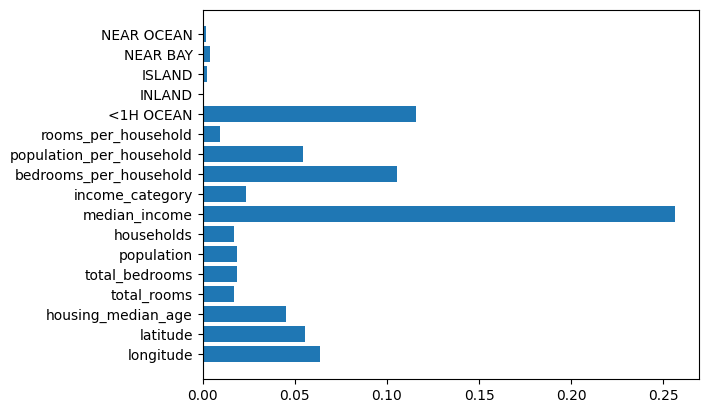

In [57]:
plt.barh(y=features, width=feature_importances[:17].tolist())

In [58]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

66724.91323204986

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=400, max_depth=5, learning_rate=0.1, loss='huber', random_state=42)

# Fit the model to the training data
gbr.fit(train_data, train_labels)

# Make predictions on the training data
train_predictions_gbr = gbr.predict(train_data)

# Calculate the RMSE on the training data
gbr_mse = mean_squared_error(train_labels, train_predictions_gbr)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

33356.98950978995